In [2]:
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import logging
LOG_FORMAT = "%(asctime)s [%(levelname)s] %(message)s"
DATE_FORMAT = "%Y-%m-%d %H:%M:%S"
logging.basicConfig(level=logging.INFO, format=LOG_FORMAT, datefmt=DATE_FORMAT)

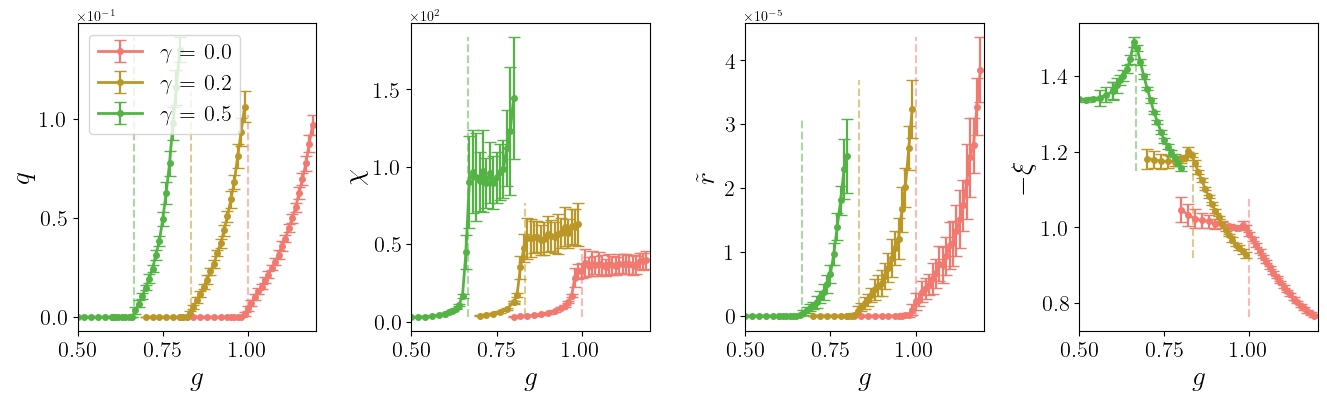

In [7]:
logging.getLogger().setLevel(logging.INFO)
prefixPath = "../../Data/results/10/a1"
gammaLists = [0.0, 0.2, 0.5]
colorLists = ["#F27970", "#BB9727", "#54B345", "#32B897", "#05B9E2", "#8983BF", "#C76DA2"]
gListOfGamma = {
    0.0: torch.arange(0.8, 0.95, 0.02).tolist() + torch.arange(0.95, 1.2, 0.01).tolist(),
    0.2: torch.arange(0.7, 0.82, 0.02).tolist()+ torch.arange(0.8, 1.0, 0.01).tolist(),
    0.5: torch.arange(0.5, 0.62, 0.02).tolist() + torch.arange(0.6, 0.8, 0.01).tolist(),
    -0.2: torch.arange(1.1, 1.4, 0.01).tolist()
}
nonLinearity = 'tanh'
eta = 0.0
labels = ["$q$", "$\chi$", "$\\tilde{r}$", "$-\\xi$", "$\\hat{Q}$", "$\\hat{\chi}$", "$\\kappa$", "$\\Gamma$"]
indexs = [0, 1, 4, 5]
fig, ax = plt.subplots(1, len(indexs), figsize=(4 * len(indexs), 4), gridspec_kw={
    "wspace": 0.4
})

for i, gamma in enumerate(gammaLists):
    gi = gListOfGamma[gamma][0]
    gf = gListOfGamma[gamma][-1]
    for j in range(len(indexs)):
        qs = []
        for t in range(50):
            record = torch.load(prefixPath + f"/gCurve-gamma{gamma}-gi{gi:.1f}-gf{gf:.1f}-eta{eta}-{nonLinearity}{t}.pt")
            gList = torch.tensor(record["gList"])[:record["currentIndex"]+1]
            QList = record["Qs"]

            qs.append(QList[indexs[j]])

        if j == 4 - 1:
            qs = [-q for q in qs]
        std, mean = torch.std_mean(torch.stack(qs), dim=0)

        ax[j].errorbar(gList, mean, yerr=std, marker="o", markersize=4, linewidth=2, elinewidth=1.6, capsize=4.0, color=colorLists[i], label="$\\gamma$ = {:.1f}".format(gamma))

        minValue = torch.min(mean - std)
        maxValue = torch.max(mean + std)
        
        ax[j].vlines([1 / (1 + gamma)], minValue, maxValue, colors=colorLists[i], alpha=0.5, linestyles="dashed")
        ax[j].ticklabel_format(style='sci', scilimits=(-1, 2), axis='y')
        ax[j].tick_params(labelsize=16)
        ax[j].set_ylabel(labels[j], fontsize=20)
        ax[j].set_xlabel("$g$", fontsize=20)

        if j == 0:
            ax[j].legend(fontsize=16)
        ax[j].set_xlim(0.5, 1.2)
        # ax[i].set_ylim(0)

gamma = 0.0
# plt.savefig(f"./fig6-zeroT-1.pdf", bbox_inches="tight")
plt.show()
plt.close()

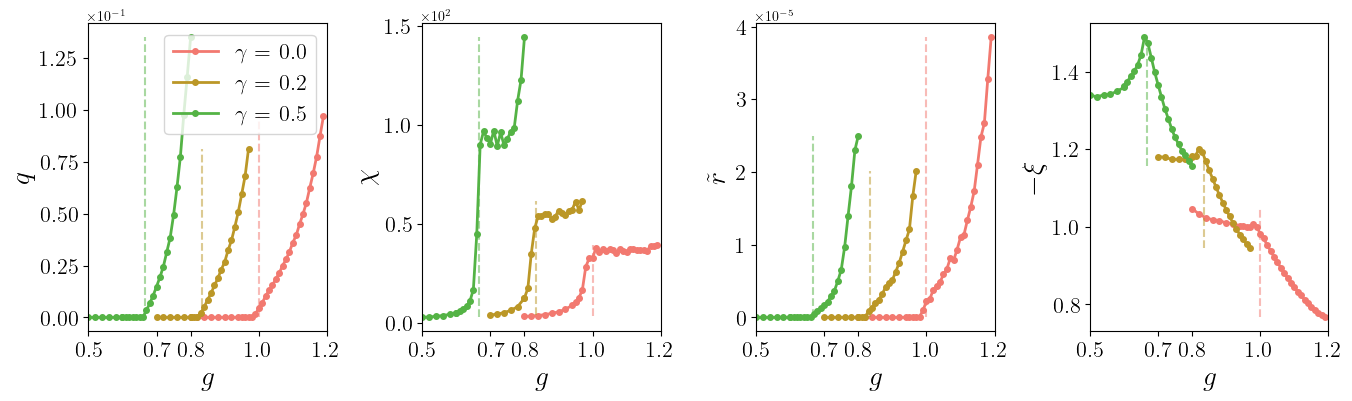

In [8]:
logging.getLogger().setLevel(logging.INFO)
prefixPath = "../../Data/results/10/a1"
gammaLists = [0.0, 0.2, 0.5]
colorLists = ["#F27970", "#BB9727", "#54B345", "#32B897", "#05B9E2", "#8983BF", "#C76DA2"]
gListOfGamma = {
    0.0: torch.arange(0.8, 0.95, 0.02).tolist() + torch.arange(0.95, 1.2, 0.01).tolist(),
    0.2: torch.arange(0.7, 0.82, 0.02).tolist()+ torch.arange(0.8, 1.0, 0.01).tolist(),
    0.5: torch.arange(0.5, 0.62, 0.02).tolist() + torch.arange(0.6, 0.8, 0.01).tolist(),
    -0.2: torch.arange(1.1, 1.4, 0.01).tolist()
}
nonLinearity = 'tanh'
eta = 0.0
labels = ["$q$", "$\chi$", "$\\tilde{r}$", "$-\\xi$", "$\\hat{Q}$", "$\\hat{\chi}$", "$\\kappa$", "$\\Gamma$"]
indexs = [0, 1, 4, 5]
fig, ax = plt.subplots(1, len(indexs), figsize=(4 * len(indexs), 4), gridspec_kw={
    "wspace": 0.4
})

for i, gamma in enumerate(gammaLists):
    gi = gListOfGamma[gamma][0]
    gf = gListOfGamma[gamma][-1]
    for j in range(len(indexs)):
        qs = []
        for t in range(50):
            record = torch.load(prefixPath + f"/gCurve-gamma{gamma}-gi{gi:.1f}-gf{gf:.1f}-eta{eta}-{nonLinearity}{t}.pt")
            gList = torch.tensor(record["gList"])[:record["currentIndex"]+1]
            QList = record["Qs"]

            if gamma == 0.2:
                gList = gList[:-2]
                QList = QList[:, :-2]
            qs.append(QList[indexs[j]])
        if j == 4 - 1:
            qs = [-q for q in qs]
        mean = torch.mean(torch.stack(qs), dim=0)

        ax[j].plot(gList, mean, marker="o", markersize=4, linewidth=2, color=colorLists[i], label="$\\gamma$ = {:.1f}".format(gamma))

        minValue = torch.min(mean)
        maxValue = torch.max(mean)
        
        ax[j].vlines([1 / (1 + gamma)], minValue, maxValue, colors=colorLists[i], alpha=0.5, linestyles="dashed")
        ax[j].ticklabel_format(style='sci', scilimits=(-1, 2), axis='y')
        ax[j].tick_params(labelsize=16)
        ax[j].set_ylabel(labels[j], fontsize=20)
        ax[j].set_xlabel("$g$", fontsize=20)

        if j == 0:
            ax[j].legend(fontsize=16)
        ax[j].set_xlim(0.5, 1.2)
        ax[j].set_xticks([0.5, 0.7, 0.8, 1.0, 1.2])
        # ax[i].set_ylim(0)

gamma = 0.0
# plt.savefig(f"./zeroT.pdf", bbox_inches="tight")
plt.show()
plt.close()